# Lung diseases dataset documentation

## Thoughts
this is my first ML project, that I decided to work on. Here, i am using the dataset provided by [@a3amat02](https://www.kaggle.com/a3amat02) on kaggle. 

The dataset includes patient data, and here is an overview:
|     |Column           |Non-Null Count  |Dtype|
|-----|-----------------|----------------|-------|
| 0   |Age              |4900 non-null   |float64|
| 1   |Gender           |4900 non-null   |object|
| 2   |Smoking Status   |4900 non-null   |object|
| 3   |Lung Capacity    |4900 non-null   |float64|
| 4   |Disease Type     |4900 non-null   |object|
| 5   |Treatment Type   |4900 non-null   |object|
| 6   |Hospital Visits  |4900 non-null   |float64|
| 7   |Recovered        |4900 non-null   |object|

although the dataset is not a very large one, and the resulting trained model won't be the most accurate, there is, it could serve a **_"fun"_** purpose for those, who are willing to try and see some predictions about ones risks and chances on the topic lung diseases.

So it well **neither** be an **exact, nor** a **trustworthy** estimator **for** one's condition as complex as **_health_**, but it could spread some awareness, that is based on pure statistics, for curiosity reasons.

## First of all, lets find our goals for the project

---

1.  **Find out gender spread lung diseases**
1. **Find out which diseases are the most dangerous and otherwise**
1.  **Find the best treatment for each disease**
1.  **Train a ML model on the given data to predict further chances based on new data**
1.  **Build a simple hosted application and host the model with the statistics and input field for user data to check on their chances for the selected stochastic model**

---

<details>
    <summary>The stochastic model will include:</summary>
   
    1. What disease does the patient tend to have

    2. Chances to survive the disease x
    
    3. What treatment is better for the patient regarding his data and disease
    
    4. How smoking influences his chances
    
    5. Optimal hospital visits for his disease

</details>


### Next, the data is loaded, cleaned and preprocessed for further training

In [1262]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

data_unclean = pd.read_csv('C:/Users/Sachar/Desktop/Coding/Data Scince R/AI-Project/lung_disease_data.csv', header=0, sep=',')
# clean out the NaN values out of the dataset
data = data_unclean.fillna(method='ffill')


# separate features and labels
X = data.drop('Recovered', axis=1)
# target set
y = data['Recovered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ["Age", "Lung Capacity", "Hospital Visits"]
categorical_columns = ["Smoking Status", "Disease Type", "Treatment Type", "Gender"]

# Preprocessing explained: 
#  1. For numerical data: Impute the missing values with median, then scaler
#  2. For categorical data: Impute the missing values with mode, then one-hot encode them

preprocesser = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ]
)

# Fit preprocesser on training data and then transoform train/test

X_train = preprocesser.fit_transform(X_train)
X_test = preprocesser.transform(X_test)

# scale for better performance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Sachar\AppData\Local\Temp\ipykernel_19120\2275806273.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data_unclean.fillna(method='ffill')


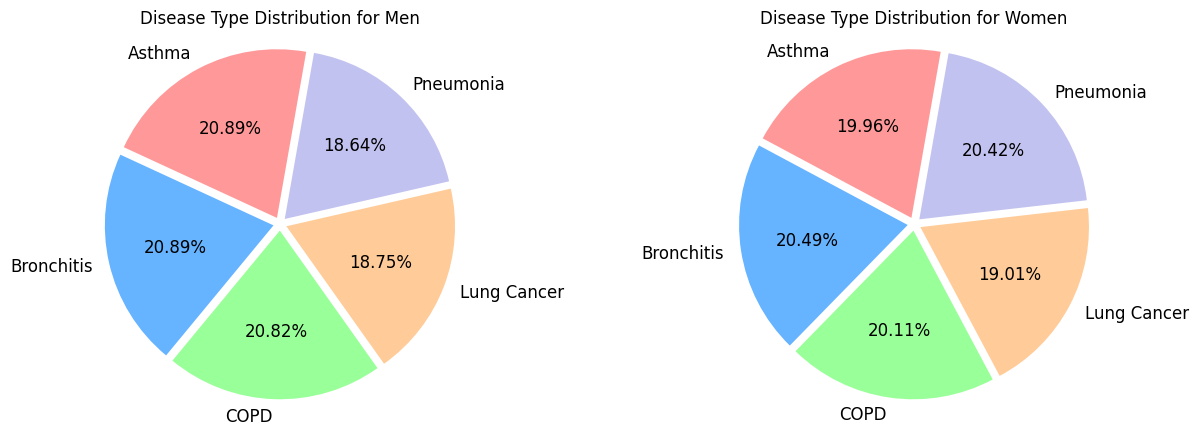

Hospital Visits
1.0     50.270270
2.0     52.615385
3.0     52.347418
4.0     53.750000
5.0     49.873418
6.0     54.353562
7.0     48.459384
8.0     51.436782
9.0     48.586118
10.0    51.190476
11.0    47.138965
12.0    53.908356
13.0    44.670051
14.0    48.672566
dtype: float64
Lung Capacity
1.00    66.666667
1.01    57.142857
1.02    46.666667
1.03    33.333333
1.04    41.666667
          ...    
5.96    61.538462
5.97    71.428571
5.98    63.636364
5.99    46.666667
6.00          NaN
Length: 501, dtype: float64
[np.float64(49.724077327324785), np.float64(50.599364701211044), np.float64(49.73040659683197), np.float64(48.65168128654971), np.float64(55.266598299646034), np.float64(46.047859930212866), np.float64(56.55274261603377), np.float64(49.66176629890308), np.float64(49.64102564102564), np.float64(49.214047972967684), np.float64(50.4111400221421), np.float64(46.79696209351381), np.float64(52.47032137518049), np.float64(53.08655667945161)]
[np.float64(50.275922672675215), np.fl

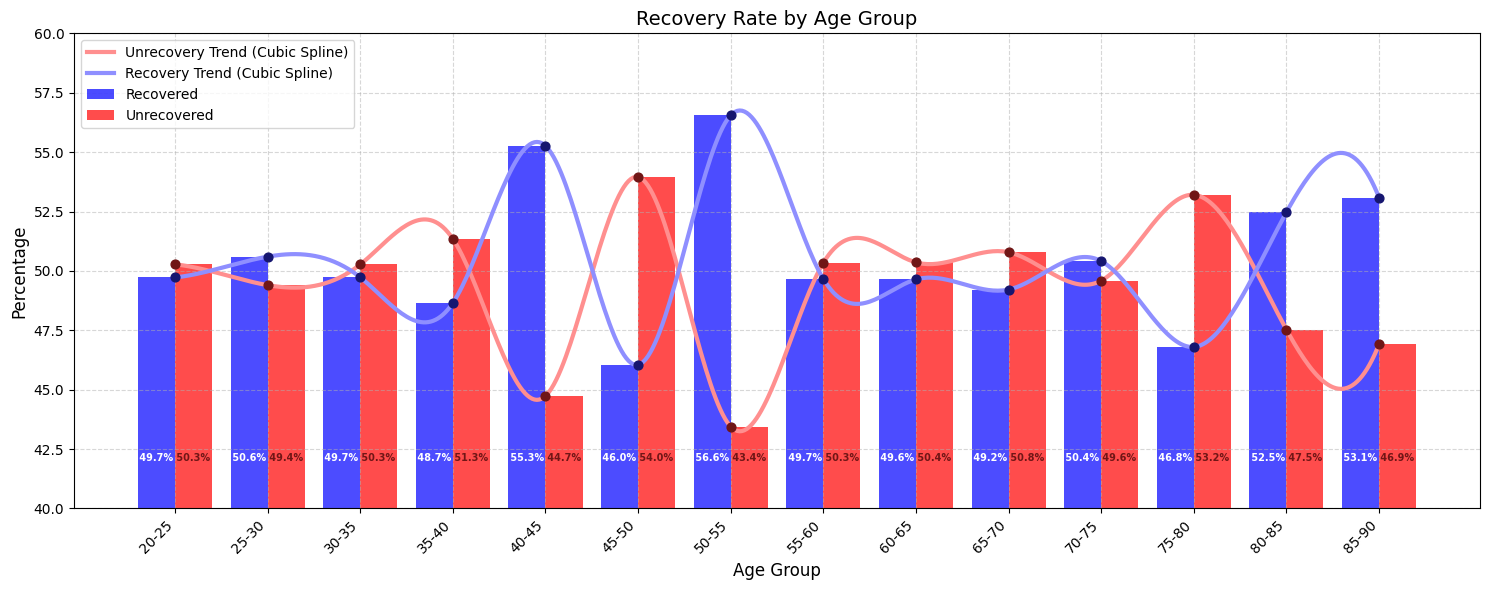

In [1263]:
# i need male data, and female data. then i need to parse it the disease type in [], then calcualte its percentage relevant to the genders diseases sum


# biplot(d.types) for gender, smoking status, recovered

# age,gender, lung cap, hosp.v, disease, smoking to recover plot (quadratic curve)

# multibarplot(gender, smoking, lung cap) to d.types

#standart plot with different grafs, each for unique disease type, on the x-axis numerical: age, lung cap, hosp visits for recovery

# the same for death


import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, CubicSpline

male_data = data[data.Gender == "Male"]
male_data_diseases = male_data["Disease Type"].value_counts()
male_data_diseases_percentage = pd.DataFrame((male_data_diseases) / male_data_diseases.sum() * 100).sort_index().to_numpy().flatten()

female_data = data[data.Gender == "Female"]
female_data_diseases = female_data["Disease Type"].value_counts()
female_data_diseases_percentage = pd.DataFrame((female_data_diseases) / female_data_diseases.sum() * 100).sort_index().to_numpy().flatten()


male_disease_index = sorted(male_data["Disease Type"].unique())
female_disease_index = sorted(female_data["Disease Type"].unique())

# print(female_data_diseases_percentage)
# print(female_data_diseases / female_data_diseases.sum() * 100)
# print(male_data_diseases_percentage)
# print(male_data_diseases / male_data_diseases.sum() * 100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].pie(male_data_diseases_percentage, labels=male_disease_index, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],explode=[0.04]*5, startangle=80, textprops={"fontsize":12, "color":"black"}, autopct="%1.2f%%")
axes[0].set_title("Disease Type Distribution for Men")
axes[0].axis("equal")

axes[1].pie(female_data_diseases_percentage, labels=female_disease_index, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],explode=[0.04]*5, startangle=80, textprops={"fontsize":12, "color":"black"}, autopct="%1.2f%%")
axes[1].set_title("Disease Type Distribution for Women")
axes[1].axis("equal")

plt.show()

age = sorted(data["Age"].unique())
lung_cap = data["Lung Capacity"]
hosp_visits = data["Hospital Visits"]
recovered = data["Recovered"]

# recovered for unique age total count 

recovered_per_age_in_percent = ((data.groupby("Age")["Recovered"].value_counts().unstack())) #splits a two valued column of no/yes into two separate
recovered_per_age_in_percent =((recovered_per_age_in_percent["Yes"]/(recovered_per_age_in_percent["Yes"]+recovered_per_age_in_percent["No"]))*100)

recovered_per_lung_capacity_in_percent = ((data.groupby("Lung Capacity")["Recovered"].value_counts().unstack())) #splits a two valued column of no/yes into two separate
recovered_per_lung_capacity_in_percent =((recovered_per_lung_capacity_in_percent["Yes"]/(recovered_per_lung_capacity_in_percent["Yes"]+recovered_per_lung_capacity_in_percent["No"]))*100)

recovered_per_hospital_visits_in_percent = ((data.groupby("Hospital Visits")["Recovered"].value_counts().unstack())) #splits a two valued column of no/yes into two separate
recovered_per_hospital_visits_in_percent =((recovered_per_hospital_visits_in_percent["Yes"]/(recovered_per_hospital_visits_in_percent["Yes"]+recovered_per_hospital_visits_in_percent["No"]))*100)


print(recovered_per_hospital_visits_in_percent)
print(recovered_per_lung_capacity_in_percent)

recovered_per_age_in_percent_meaned = []
for i in range(0, int(len(recovered_per_age_in_percent)/5)):
    value = 0
    for j in range(0, 5):
        value += recovered_per_age_in_percent.values[i*5+j]
    recovered_per_age_in_percent_meaned.append(value/5)
print(recovered_per_age_in_percent_meaned)

# unrecoverable_per_age_in_percent = 100 - recovered_per_age_in_percent*2
unrecoverable_per_age_in_percent = []
for i in range(0, len(recovered_per_age_in_percent_meaned)):
    value = (100 - recovered_per_age_in_percent_meaned[i])
    unrecoverable_per_age_in_percent.append(value)
print(unrecoverable_per_age_in_percent)

print(len(recovered_per_age_in_percent)/10)

#need lung capacity and hospital visits distribution for recovered and unrecovered

lung_cap=[]
hospital_vis=[]
######

age_groups = ["20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", 
              "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90"]
midpoints = np.arange(22.5, 87.6, 5)  # Midpoints of age groups

# Create figure
fig, ax = plt.subplots(figsize=(15, 6))

# Plot bars (side-by-side)
bar_width = 2  # Width of each bar (5-year span)
recovered_bars=ax.bar(midpoints - bar_width/2, recovered_per_age_in_percent_meaned, width=bar_width, 
       label='Recovered', color='blue', alpha=0.7)
unrecovered_bars=ax.bar(midpoints + bar_width/2, unrecoverable_per_age_in_percent, width=bar_width, 
       label='Unrecovered', color='red', alpha=0.7)

def add_bar_labels(bars, text_color):
    for bar in bars:
        height = bar.get_height()
        # Position text at 40% of the bar's height (adjust 0.4 to move up/down)
        ax.text(bar.get_x() + bar.get_width()/2, 42, 
                f' {height:.1f}% ',  # Format to 1 decimal place
                ha='center', 
                color=text_color, fontsize=7, fontweight='bold')


# Cubic spline interpolation (ensures curve passes through all points)
cs_recovered = CubicSpline(midpoints, recovered_per_age_in_percent_meaned)
x_smooth = np.linspace(midpoints.min(), midpoints.max(), 500)
y_smooth = cs_recovered(x_smooth)

cs_unrecovered = CubicSpline(midpoints, unrecoverable_per_age_in_percent)
x_smooth_unrecovered = np.linspace(midpoints.min(), midpoints.max(), 500)
y_smooth_unrecovered = cs_unrecovered(x_smooth_unrecovered)

# Plot the interpolated curve
ax.plot(x_smooth, 100 - y_smooth, '-', color='#ff8f8f', linewidth=3,
        label='Unrecovery Trend (Cubic Spline)', zorder=3)
ax.plot(x_smooth_unrecovered,100 -y_smooth_unrecovered, '-', color='#8f8fff', linewidth=3, 
        label='Recovery Trend (Cubic Spline)', zorder=3)
ax.scatter(midpoints, recovered_per_age_in_percent_meaned, color='#161670', s=40, zorder=4, 
           )
ax.scatter(midpoints, unrecoverable_per_age_in_percent, color='#701616', s=40, zorder=4, 
           )

# Add labels - white text for dark bars
add_bar_labels(recovered_bars, 'white')  
add_bar_labels(unrecovered_bars, '#701616')

# Customize
ax.set_title("Recovery Rate by Age Group", fontsize=14)
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_xticks(midpoints)
ax.set_xticklabels(age_groups, rotation=45, ha='right')
ax.legend(loc='upper left')
ax.set_ylim(40, 60)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **RandomForest**

In [1264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=10)
model.fit(X_train_scaled, y_train)
preditctions = model.predict(X_test)

print(f"The accuracy: {accuracy_score(y_test, preditctions)}\n")
print(f"Train accuracy: {model.score(X_train_scaled, y_train)}\n")
print(f"Test accuracy: {model.score(X_test_scaled, y_test)}\n")
print(classification_report(y_test, preditctions))

The accuracy: 0.5076923076923077

Train accuracy: 0.5579326923076923

Test accuracy: 0.510576923076923

              precision    recall  f1-score   support

          No       0.47      0.46      0.47       487
         Yes       0.54      0.55      0.54       553

    accuracy                           0.51      1040
   macro avg       0.51      0.51      0.51      1040
weighted avg       0.51      0.51      0.51      1040



### **check for unnessecary categories**

> plot the relevant categories for randomforest

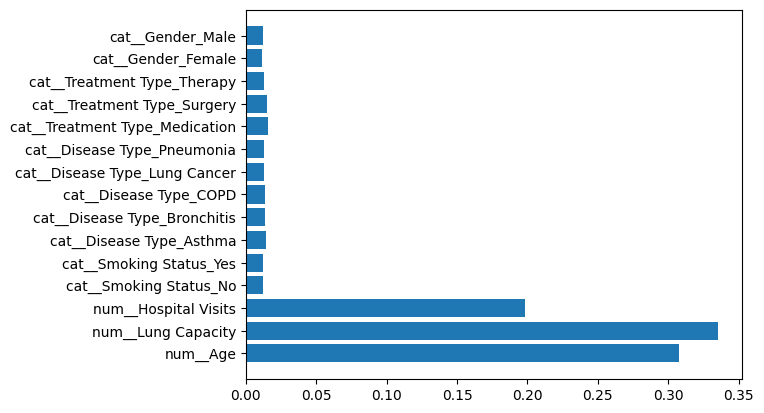

In [1265]:
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(ticks=range(len(preprocesser.get_feature_names_out())),
        labels=preprocesser.get_feature_names_out())
plt.show()


In [1266]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
preditctions = model.predict(X_test)

print(f"The accuracy: {accuracy_score(y_test, preditctions)}\n")
print(f"Train accuracy: {model.score(X_train_scaled, y_train)}\n")
print(f"Test accuracy: {model.score(X_test_scaled, y_test)}\n")
print(classification_report(y_test, preditctions))

The accuracy: 0.5259615384615385

Train accuracy: 0.5165865384615385

Test accuracy: 0.4932692307692308

              precision    recall  f1-score   support

          No       0.46      0.06      0.11       487
         Yes       0.53      0.93      0.68       553

    accuracy                           0.53      1040
   macro avg       0.49      0.50      0.39      1040
weighted avg       0.50      0.53      0.41      1040



C:\Users\Sachar\AppData\Local\Temp\ipykernel_19120\765981350.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=df_scores, palette="viridis")


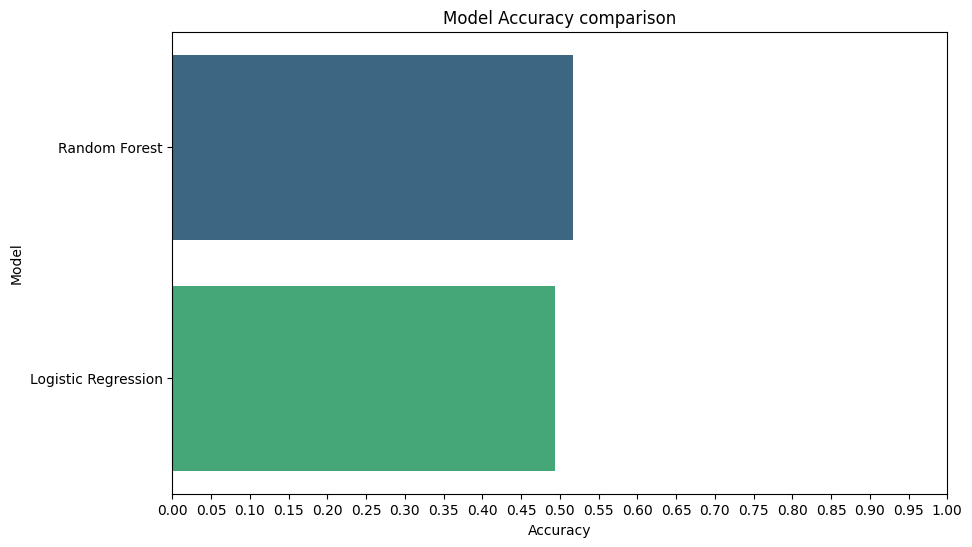

In [1267]:
import seaborn as sns

models ={
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

scores = {}
cms = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)
    cms[name] = confusion_matrix(y_test, y_pred)


df_scores = pd.DataFrame({"Model": scores.keys(), "Accuracy": scores.values()})
df_scores = df_scores.sort_values("Accuracy", ascending=False)

#create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=df_scores, palette="viridis")
plt.title("Model Accuracy comparison")
plt.xlim(0,1.0)
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0])
plt.show()

#### **Plotting the heatmap for used training algorithms**

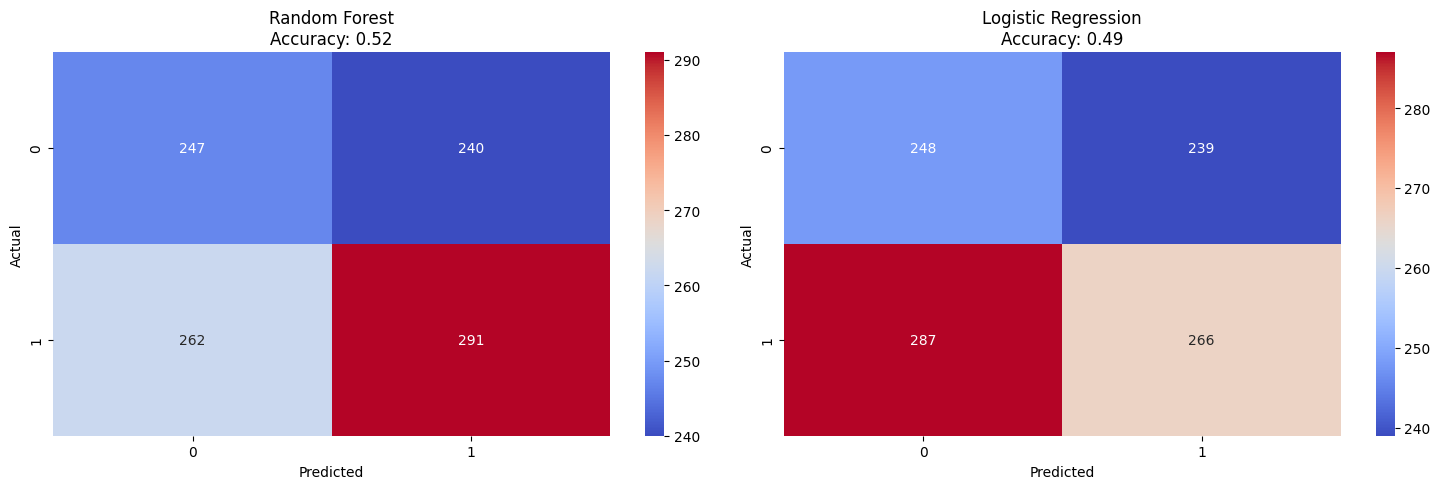

In [1268]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

for (name, cm), ax in zip(cms.items(), axes):
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
    ax.set_title(f"{name}\nAccuracy: {scores[name]:.2f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()